# Chapter 8: Hardware Considerations
Figures and exercises for Chapter 8 of [Sustainable AI](https://www.oreilly.com/library/view/sustainable-ai/9781098155506/) by Raghavendra Selvan.

**To run locally without errors, clone the entire repository:** 

``` git clone https://github.com/raghavian/sustainable_ai.git ```

## **Section: Environmental Cost of AI Hardware**
### **Figure 8-2.** Trends of e-waste generated and documented extent of e-waste recycling. (Source: data from [E-Waste Monitor](https://ewastemonitor.info).)

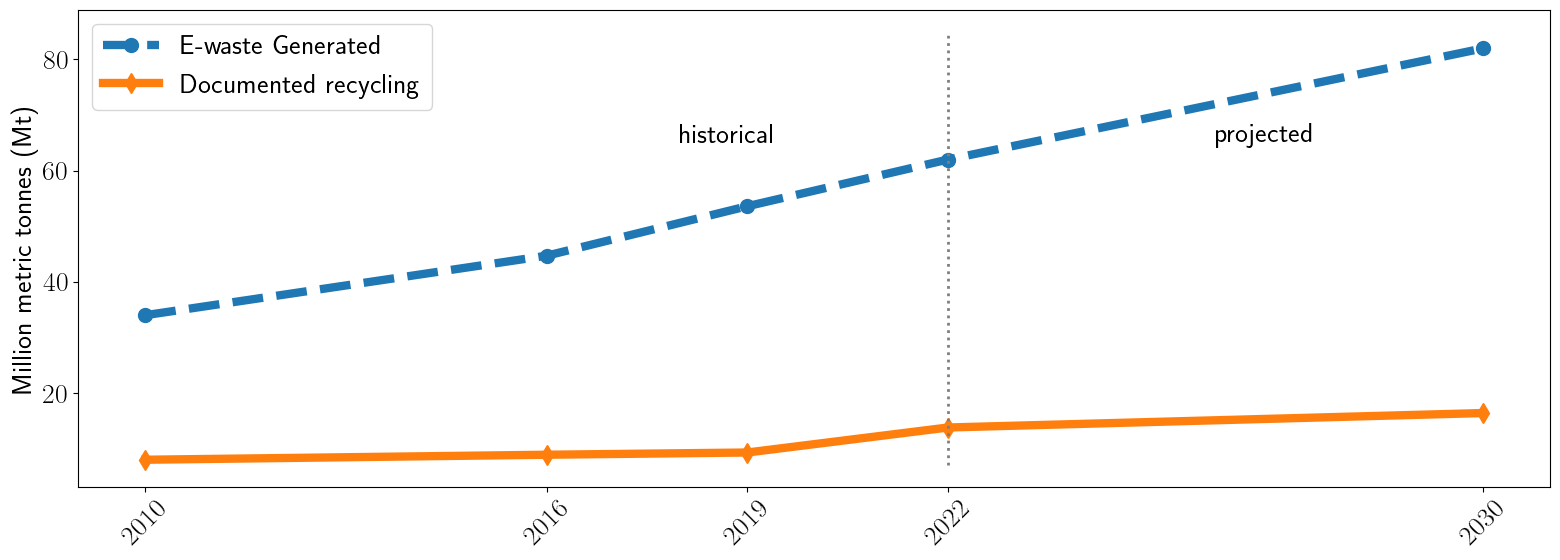

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
params = {'font.size': 20,
          'font.weight': 'normal',
          'axes.labelsize':20,
          'axes.titlesize':20,
          'axes.labelweight':'normal',
          'axes.titleweight':'normal',
          'legend.fontsize': 20,
          "text.usetex": True,
         }
matplotlib.rcParams.update(params)
# Load the data you downloaded
df = pd.read_csv('../data/ch08_global_e_waste_monitor_selected.csv')

plt.figure(figsize=(16, 6))
plt.plot(df['Year'], df['E‑waste generated (Mt)'], marker='o', markersize=10, linestyle='--', linewidth=6,label='E-waste Generated')
plt.plot(df['Year'], df['Documented recycling (Mt)'], marker='d', markersize=10, linewidth=6,label='Documented recycling')
plt.xticks(ticks=df["Year"], rotation=45)

ymin = 7
ymax = 85

plt.annotate('historical',xy=(2019,65),xytext=(2018,65),fontsize=20)
plt.annotate('projected',xy=(2027,65),xytext=(2026,65),fontsize=20)
plt.plot(np.ones(10)*2022,np.linspace(ymin,ymax,10),linestyle=':',linewidth=2,color='tab:gray')
plt.ylabel('Million metric tonnes (Mt)')
plt.legend()
plt.tight_layout()

## **Section: Improving the Resource Efficiency of AI Hardware**

### **Figure 8-6.** Energy efficiency of the top 500 supercomputers globally with marker sizes shown in proportion to their energy efficiency measured in GFLOPs/watt. Random indices are assigned on the x-axis for better visualization. (Source: [Green500](https://oreil.ly/zmWCM)).

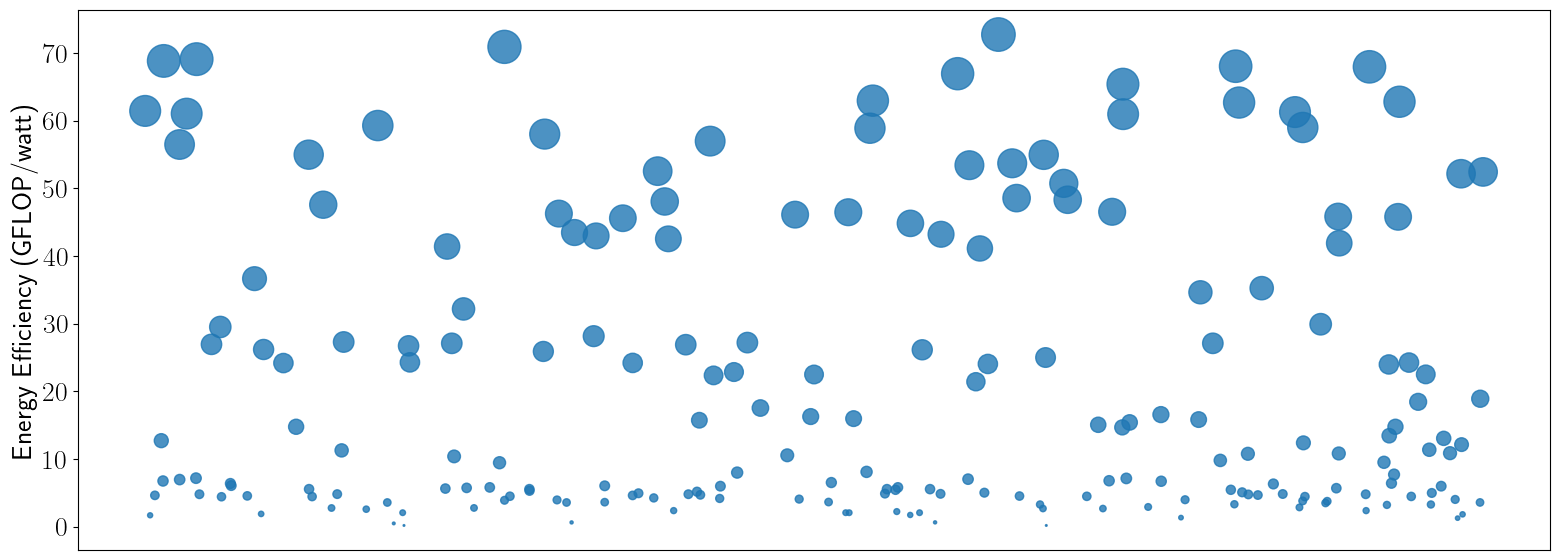

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pdb
import matplotlib
import numpy as np

params = {'font.size': 20,
          'font.weight': 'normal',
          'axes.labelsize':20,
          'axes.titlesize':20,
          'axes.labelweight':'normal',
          'axes.titleweight':'normal',
          'legend.fontsize': 20,
          "text.usetex": True,
         }
matplotlib.rcParams.update(params)

df = pd.read_excel('../data/ch08_green500_top_202411.xlsx')
plt.figure(figsize=(16,6))
rng = np.random.default_rng(0)
efficiencies = df['Energy Efficiency [GFlops/Watts]']
x_jitter = rng.uniform(-0.05, 0.05, size=len(efficiencies))
plt.scatter(x_jitter, efficiencies, s=8*efficiencies, alpha=0.8,marker='o')
plt.ylabel('Energy Efficiency (GFLOP/watt)')
plt.xticks([])
plt.tight_layout()

### **Figure 8-7.** The trade-off of green scheduling.

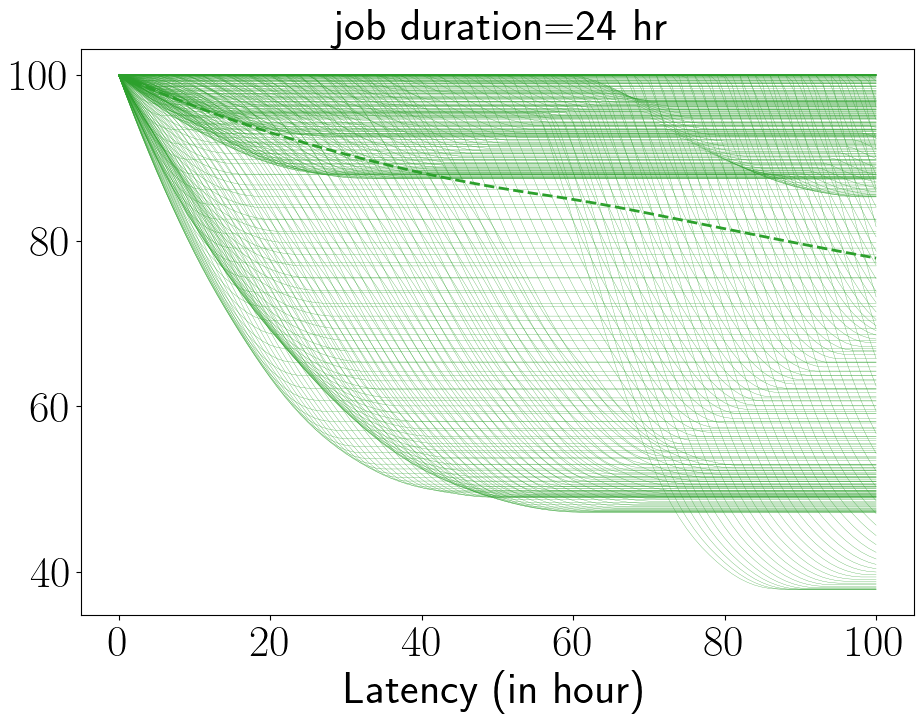

In [3]:
import pdb
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

params = {'font.size': 32,
          'axes.labelsize':32,
          'axes.titlesize':32,
          'axes.titleweight':'normal',
          'legend.fontsize': 32,
         }
matplotlib.rcParams.update(params)

def sliding_window_all_time(data,job_dur=1):
    plt.figure(figsize=(10,8))
    k=1
    jobs = [24]
    plt_data = []
    for job_dur in jobs:
        plt.subplot(1,len(jobs),k)
        for cIdx in range(data.shape[0]):
            co2 = data[cIdx,:100+job_dur]
            co2 = np.convolve(co2,np.ones(job_dur,dtype=int),'valid')
            co2 = co2/co2[0] #job_dur 
            co2[co2 > 1] = 1
            co2 = co2*100
            
            for i in range(1,len(co2)):
                if co2[i] > co2[i-1]:
                    co2[i] = co2[i-1]
            plt.plot(co2, linewidth=0.2,c='tab:green')#label='Compute job carbon emissions')
            plt_data.append(co2)
        plt.ylabel('% carbon emissions gCO₂eq')
        plt.xlabel('Latency (in hour)')
        plt.title('job duration=%d hr'%job_dur)
        plt.tight_layout()
        k+=1
    
    plt_data = np.array(plt_data).mean(0)
    
    plt.plot(plt_data,linewidth=2,c='tab:green',linestyle='--')
    return plt_data

def carbon_emissions(starttime: datetime):
    window_intensities = week_intensity.loc[starttime : starttime + example_job_length] # Intensities in window spanned by start time and end time
    mean_intensity = window_intensities['Carbon Intensity gCO₂eq/kWh (direct)'].mean()
    return mean_intensity * example_energy_usage * 2.77777778e-7 # Convert energy usage from J to kwh, then multiply with mean intensity to get total emissions

dk2_2021 = pd.read_csv('../data/ch08_DK-DK2_2021_hourly.csv', index_col='Datetime (UTC)', parse_dates=['Datetime (UTC)'])
dk2_2022 = pd.read_csv('../data/ch08_DK-DK2_2022_hourly.csv', index_col='Datetime (UTC)', parse_dates=['Datetime (UTC)'])
dk2_2023 = pd.read_csv('../data/ch08_DK-DK2_2023_hourly.csv', index_col='Datetime (UTC)', parse_dates=['Datetime (UTC)'])
df = pd.concat([dk2_2021,dk2_2022, dk2_2023])
train = pd.concat([dk2_2021,dk2_2022])
test = pd.concat([dk2_2023])

week_intensity = df.loc[datetime(2022,2,1):datetime(2022,2,28)] # Intensities during considered week
example_job_length = timedelta(days=1,hours=8) # ASSUMPTION 1: A job takes 1 day, 8 hours
power_draw_W = 500 # ASSUMPTION 2: The job draws 500 W on average
example_energy_usage = example_job_length.seconds * 500 # 500 (J/s) * jobLength (s) = total energy usage (J)

xs = pd.date_range(datetime(2022,2,1), datetime(2022,2,28), freq='h')

possible = [date for date in xs if date < datetime(2022,2,5)]
min_starttime = np.argmin([carbon_emissions(date) for date in possible])
max_starttime = np.argmax([carbon_emissions(date) for date in possible])
starttime = xs[min_starttime]

co2 = [carbon_emissions(date) for date in xs]
co2 = np.array(co2)

data = np.zeros((len(co2)-200,200))
for i in range(data.shape[0]):
    data[i] = co2[i:200+i]

plt_data = sliding_window_all_time(data)

### **Example 8-1.** Enabling data parallelism in PyTorch is straightforward if multiple GPUs are available for training

In [1]:
import torch
import torch.nn as nn
# Check if GPUs are available and move the model to GPU(s)
if torch.cuda.is_available():
    model = model.cuda() # Move model to GPU
    model = nn.DataParallel(model)
# Wrap model with DataParallel for multi-GPU support
# Continue with normal training...

### **Example 8-2.** Basic PyTorch code to save the ResNet-18 model into shards of 10MB and reloading the original model from these shards

In [3]:
import torch, os

def shard_model(model, shard_dir="../output/model_shards", shard_size_mb=10):
    os.makedirs(shard_dir, exist_ok=True)  # Directory to store shards
    tensors, size, shards = model.state_dict(), 0, [{}] # Init. shard list and tracking variables
    limit = shard_size_mb * 1024 * 1024 # Convert MB to bytes 

    for k, v in tensors.items(): # Calculate tensor size in bytes
        v = v.cpu()
        v_size = v.element_size() * v.numel()
        if size + v_size > limit: # If shard is full, start a new one
            shards.append({})
            size = 0
        shards[-1][k] = v
        size += v_size
    
    # Save shards as separate file
    [torch.save(shard, f"{shard_dir}/shard_{i}.pth") for i, shard in enumerate(shards)] 
    return len(shards)

def reload_model(model, shard_dir="../output/model_shards"):
    # Load each shard in order
    state_dict = {k: v for f in sorted(os.listdir(shard_dir)) 
                  for k, v in torch.load(f"{shard_dir}/{f}", map_location="cpu").items()}
    model.load_state_dict(state_dict) # Load parameters into model
    return model

# Example Usage
if __name__ == "__main__":
    import timm
    model = timm.create_model('resnet18',pretrained=True)
    num_shards = shard_model(model)  # Shard model
    print('Model saved into %d shards'%num_shards)
    model_reloaded = reload_model(model)  # Reload model
    print('Reloaded the model from shards!')

Model saved into 6 shards
Reloaded the model from shards!


### **Example 8-3.** A simple case for chunking an MLP into two chunks for using two GPUs

In [5]:
import torch
import torch.nn as nn
from torch.distributed.pipeline.sync import Pipe

# Define two sequential stages of simple MLP model
class Stage1(nn.Module):
    def __init__(self):
        super(Stage1, self).__init__()
        self.fc1 = nn.Linear(784, 128)
    def forward(self, x):
        return torch.relu(self.fc1(x))

class Stage2(nn.Module):
    def __init__(self):
        super(Stage2, self).__init__()
        self.fc2 = nn.Linear(128, 10)
    def forward(self, x):
        return self.fc2(x)

# Use Pipe to wrap the model and enable pipeline parallelism
def get_pipeline_model():
    model = nn.Sequential(Stage1(), Stage2())
    return Pipe(model,
                devices=[torch.device('cuda:0'), torch.device('cuda:1')], chunks=2)
# Resume normal training ...

### **Figure 8-10.** DVFS and its impact on power consumption when tasked with a workload that has variable GPU utilization assuming a maximum thermal power draw (TDP) of 100W.

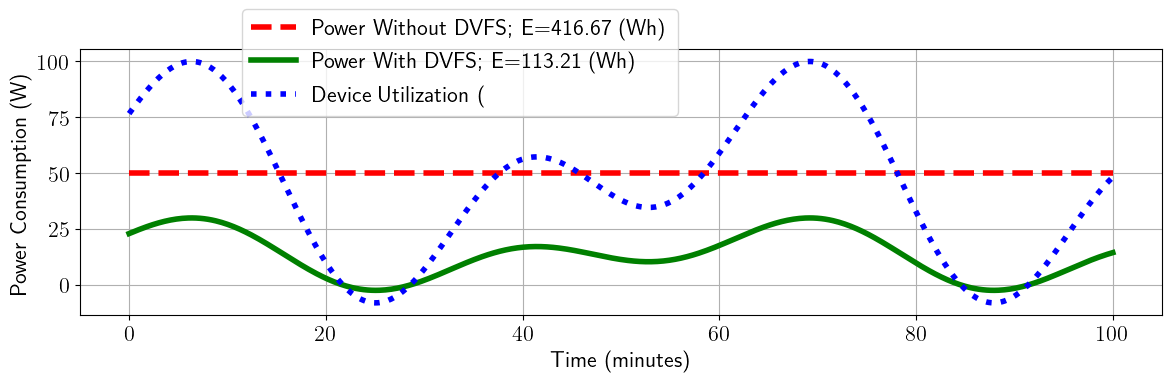

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

params = {'font.size': 16,
          'font.weight': 'normal',
          'axes.labelsize':16,
          'axes.titlesize':16,
          'axes.labelweight':'normal',
          'axes.titleweight':'normal',
          'legend.fontsize': 16,
         }
matplotlib.rcParams.update(params)
time = np.linspace(0, 100, 500)  # Simulate 100 seconds with 500 time steps
workload = np.sin(0.2 * time) + np.cos(0.1 * time) + 1.5  # Normalized workload
# Normalize workload to represent CPU utilization in percentage
cpu_utilization = (workload / np.max(workload)) * 100  # Scale to 0-100%

# Adjust power consumption to reflect realistic CPU scaling behavior
power_no_dvfs = np.full_like(time, 50)  # Constant 50W without DVFS
power_with_dvfs = (cpu_utilization / 100) * 30  # Scale power to max 30W
en_no_dvfs = np.sum(power_no_dvfs)/60
en_with_dvfs = np.sum(power_with_dvfs)/60

# Plotting
plt.figure(figsize=(12, 4))
plt.plot(time, power_no_dvfs, label="Power Without DVFS; E=%.2f (Wh)"%en_no_dvfs, linestyle="--", color="red",linewidth=4)
plt.plot(time, power_with_dvfs, label="Power With DVFS; E=%.2f (Wh)"%en_with_dvfs, color="green",linewidth=4)
plt.plot(time, cpu_utilization, label="Device Utilization (%)", linestyle="dotted", color="blue",linewidth=4)  # Now in %

# Labels and legend
plt.xlabel("Time (minutes)")
plt.ylabel("Power Consumption (W)")
#plt.title("CPU Utilization vs. Power Consumption (With and Without DVFS)")
plt.legend(loc=(0.15,0.75))
plt.grid(True)
plt.tight_layout()

### **Figure 8-11.** Energy cost for executing some of the NVIDIA instructions across different generations of NVIDIA GPUs. (Source: data derived from [Yehia Arafa et al. [2020]](https://arxiv.org/abs/2002.07795).)

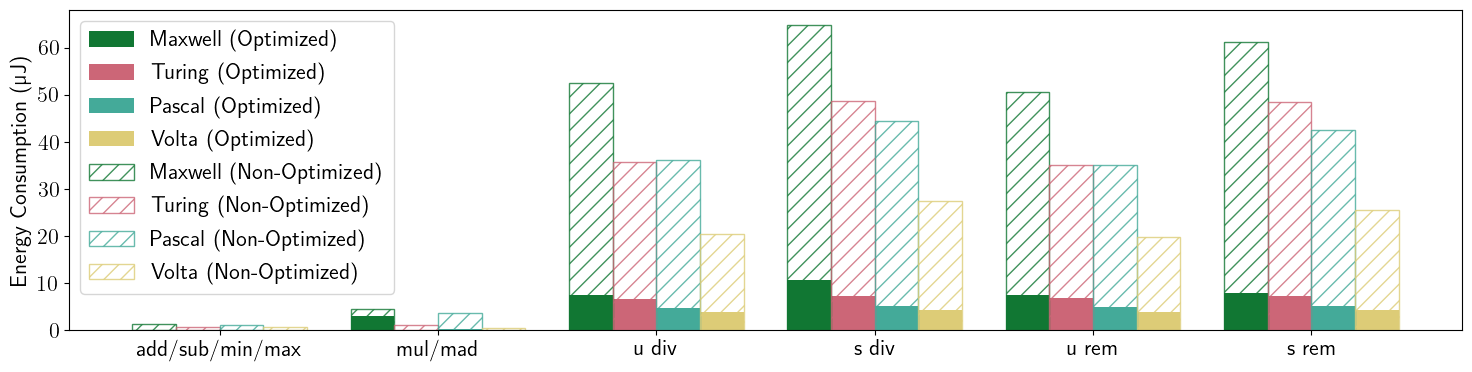

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

params = {'font.size': 16,
          'font.weight': 'normal',
          'axes.labelsize':16,
          'axes.titlesize':16,
          'axes.labelweight':'normal',
          'axes.titleweight':'normal',
          'legend.fontsize': 16,
         }
matplotlib.rcParams.update(params)

# New architecture order
architectures = ["Maxwell", "Turing", "Pascal", "Volta"]

# New instruction order
instructions = [
    "add/sub/min/max", "mul/mad", "{u} div", "{s} div", "{u} rem", "{s} rem"
]

# Mapping old indices to new order
instruction_indices = [0, 1, 5, 2, 6, 3]  # Corresponding to new order
architecture_indices = [0, 3, 1, 2]  # Maxwell -> 0, Turing -> 3, Pascal -> 1, Volta -> 2

# Reorder the data based on new instruction and architecture order
optimized_reordered = np.array([
    [0.0942, 0.0293, 0.0277, 0.0064],  # add/sub/min/max
    [3.0239, 0.0434, 0.2853, 0.0092],  # mul/mad
    [7.44783, 6.6068, 4.7398, 3.9254],  # {u} div
    [10.5921, 7.2119, 5.027, 4.2489],  # {s} div
    [7.5357, 6.8026, 4.838, 3.9587],  # {u} rem
    [7.8512, 7.3197, 5.0539, 4.21]  # {s} rem
])

non_optimized_reordered = np.array([
    [1.2453, 0.6203, 1.0264, 0.6509],  # add/sub/min/max
    [4.5826, 0.9969, 3.6194, 0.5228],  # mul/mad
    [52.5558, 35.82, 36.24, 20.4411],  # {u} div
    [64.7649, 48.77, 44.51, 27.4008],  # {s} div
    [50.6491, 35.1347, 35.07, 19.6811],  # {u} rem
    [61.1036, 48.3881, 42.48, 25.4413]  # {s} rem
])

x = np.arange(len(instructions))  # X locations for the groups
width = 0.2  # Bar width

# Define a colorblind-friendly palette
colors = ["#117733", "#CC6677", "#44AA99", "#DDCC77"]  # Maxwell, Turing, Pascal, Volta

fig, ax = plt.subplots(figsize=(15, 4))

# Plot for optimized values
for i, arch in enumerate(architectures):
    ax.bar(x + (i - 1.5) * width, optimized_reordered[:, i], width, label=f"{arch} (Optimized)", color=colors[i])

# Plot for non-optimized values with hatching
for i, arch in enumerate(architectures):
    ax.bar(x + (i - 1.5) * width, non_optimized_reordered[:, i], width, hatch='//', edgecolor=colors[i], fill=False, alpha=0.8, label=f"{arch} (Non-Optimized)")

ax.set_ylabel("Energy Consumption (µJ)")
ax.set_xticks(x)
ax.set_xticklabels(instructions)#, rotation=0, ha="right")
ax.legend()
plt.tight_layout()